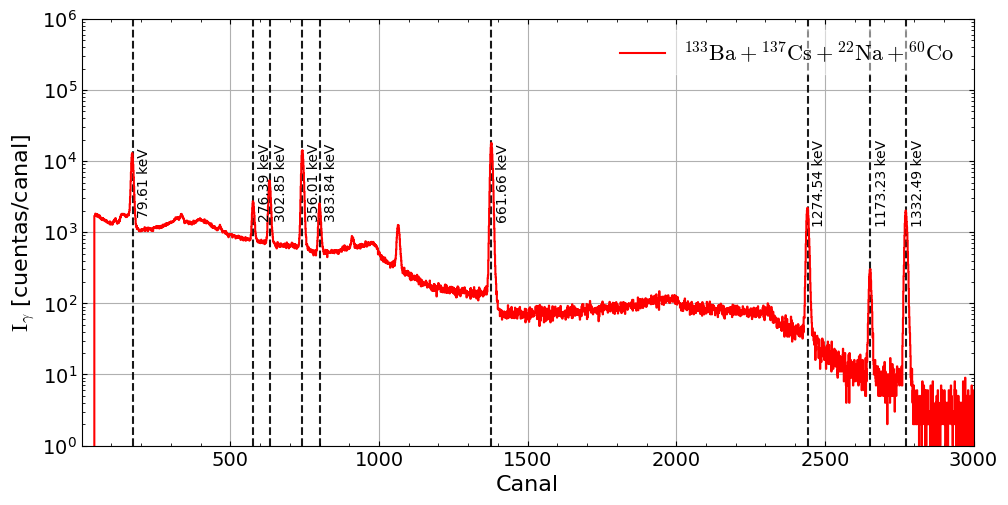


Pico:      79.61 keV
b0:        1458 ± 28
b1:        -13.800 ± 1.329
Y:         11167 ± 88
μ:         170.07 ± 0.03
σ:         3.55 ± 0.03
FWHM:      8.36 ± 0.08
Intensidad:      99428 ± 1235


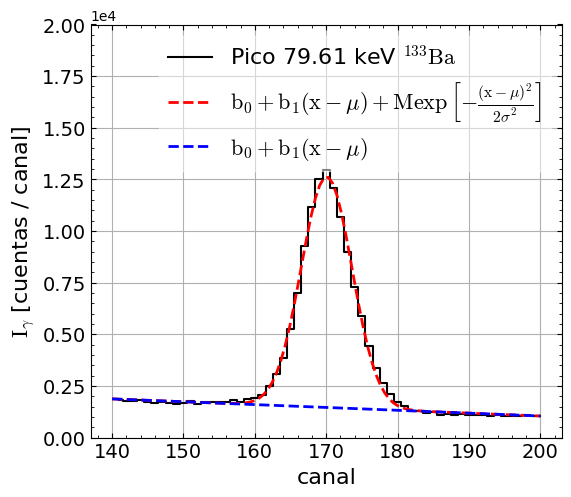


Pico:      276.40 keV
b0:        771 ± 12
b1:        -0.261 ± 0.758
Y:         1903 ± 27
μ:         576.79 ± 0.05
σ:         3.44 ± 0.06
FWHM:      8.09 ± 0.14
Intensidad:      16388 ± 374


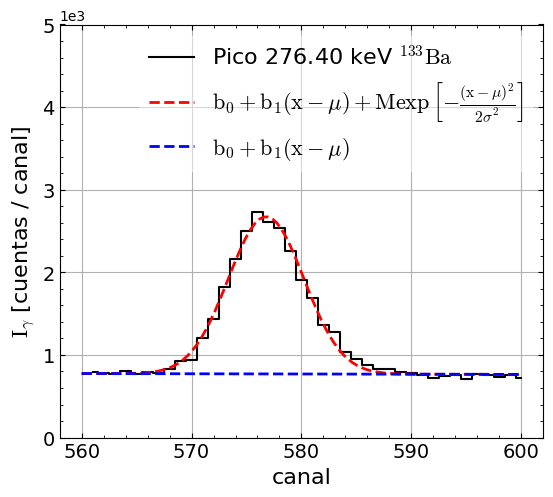


Pico:      302.85 keV
b0:        742 ± 25
b1:        1.936 ± 1.611
Y:         4534 ± 58
μ:         631.83 ± 0.05
σ:         3.55 ± 0.06
FWHM:      8.36 ± 0.13
Intensidad:      40373 ± 830


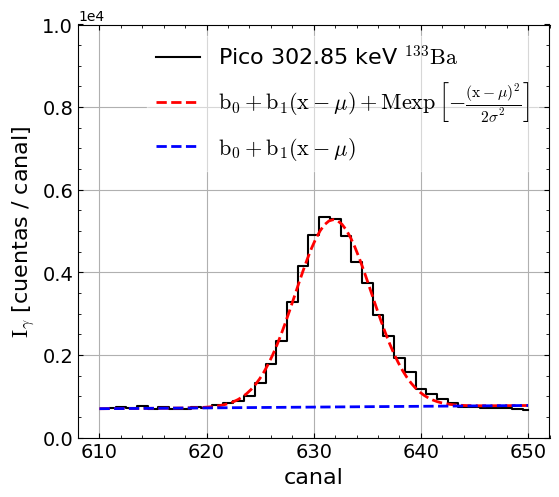


Pico:      356.01 keV
b0:        648 ± 56
b1:        1.595 ± 3.027
Y:         13490 ± 151
μ:         742.44 ± 0.05
σ:         3.56 ± 0.05
FWHM:      8.39 ± 0.12
Intensidad:      120463 ± 2143


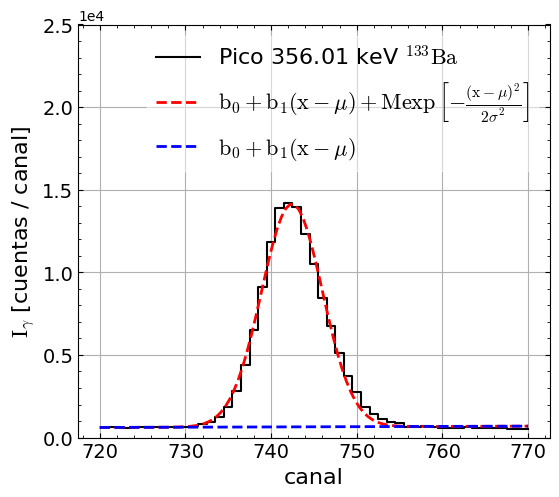


Pico:      383.85 keV
b0:        537 ± 11
b1:        1.092 ± 0.678
Y:         1919 ± 24
μ:         800.31 ± 0.05
σ:         3.60 ± 0.06
FWHM:      8.49 ± 0.14
Intensidad:      17343 ± 354


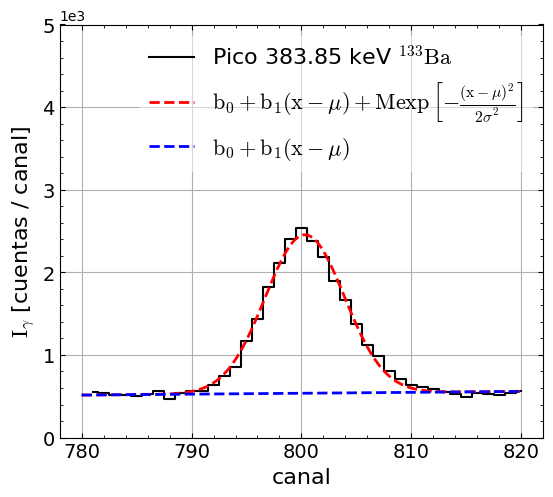


Pico:      661.66 keV
b0:        207 ± 83
b1:        6.679 ± 5.270
Y:         17555 ± 187
μ:         1378.19 ± 0.04
σ:         3.59 ± 0.05
FWHM:      8.46 ± 0.11
Intensidad:      158095 ± 2712


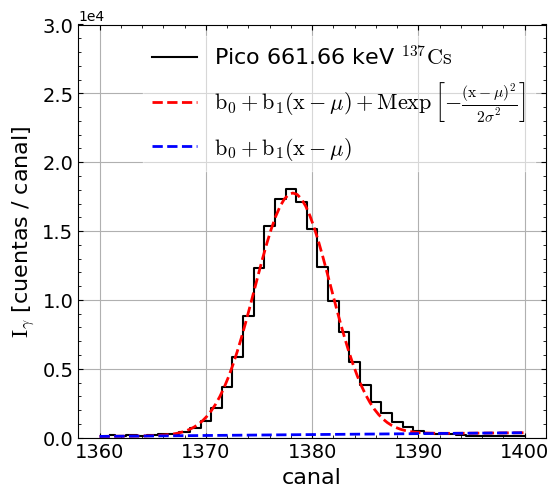


Pico:      1274.54 keV
b0:        12 ± 2
b1:        0.202 ± 0.133
Y:         290 ± 5
μ:         2652.06 ± 0.07
σ:         3.61 ± 0.07
FWHM:      8.50 ± 0.17
Intensidad:      2622 ± 69


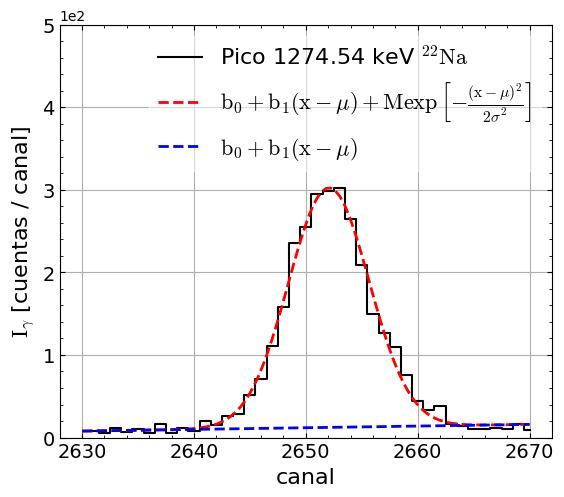


Pico:      1173.22 keV
b0:        53 ± 10
b1:        1.013 ± 0.623
Y:         2152 ± 22
μ:         2441.67 ± 0.04
σ:         3.72 ± 0.05
FWHM:      8.75 ± 0.11
Intensidad:      20051 ± 330


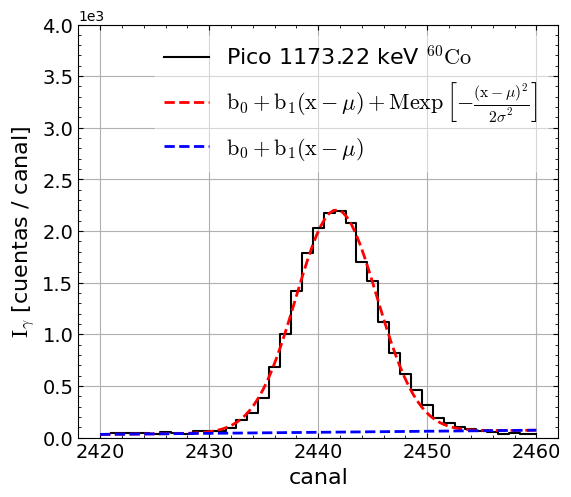


Pico:      1332.49 keV
b0:        27 ± 14
b1:        1.570 ± 0.879
Y:         1909 ± 31
μ:         2772.43 ± 0.07
σ:         3.73 ± 0.08
FWHM:      8.79 ± 0.18
Intensidad:      17862 ± 464


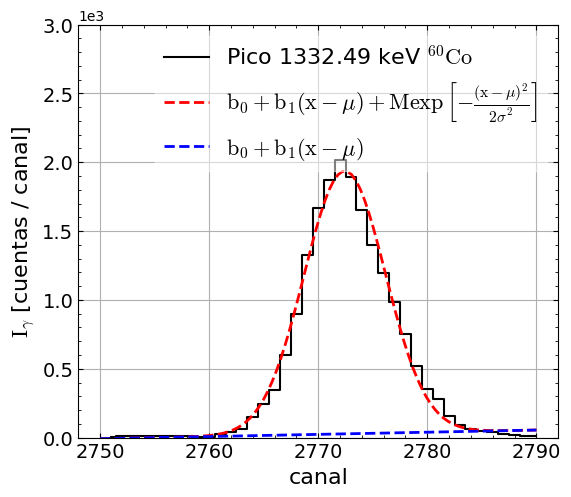


Ajuste lineal (Canal vs. Energía en keV):
a0:        -1.72 ± 0.02
a1:        0.4813 ± 0.00


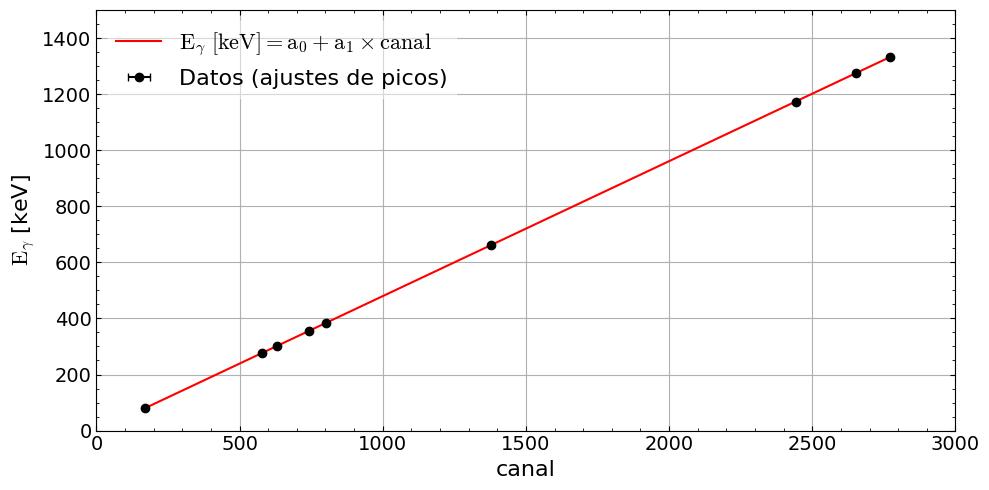

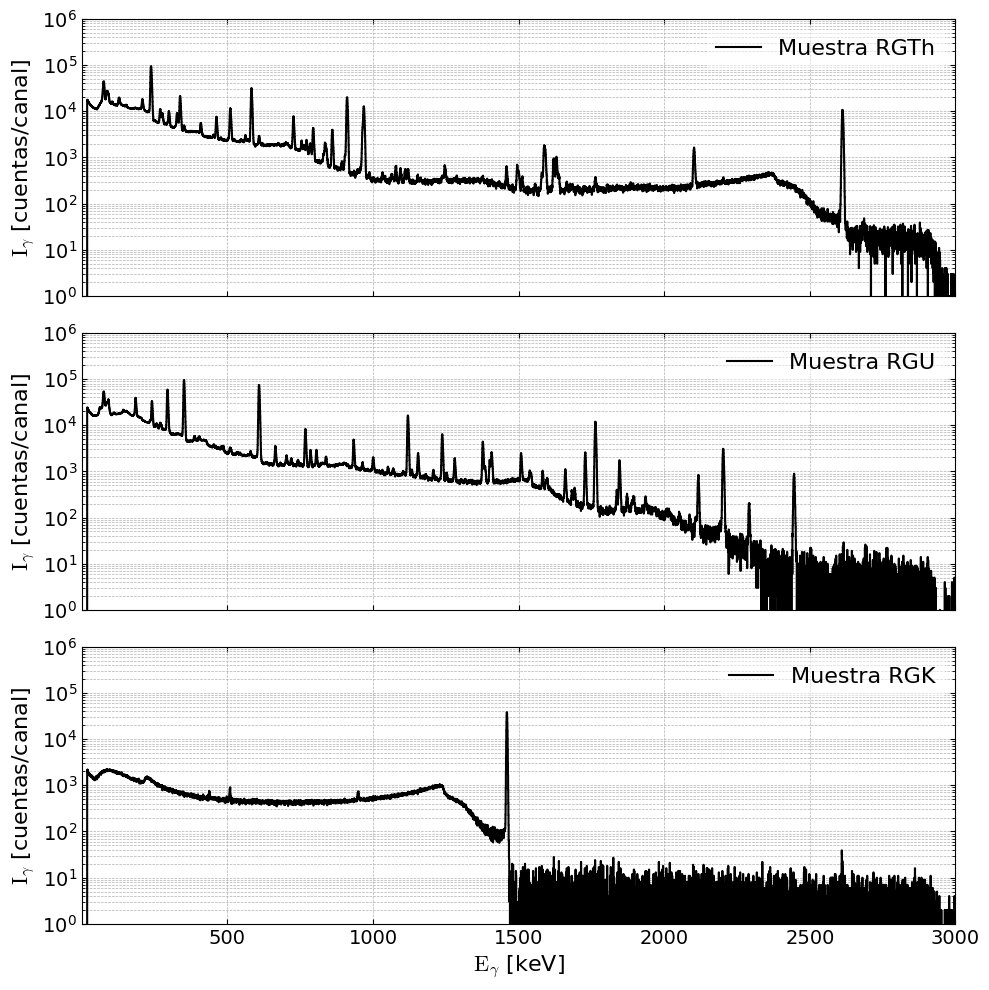

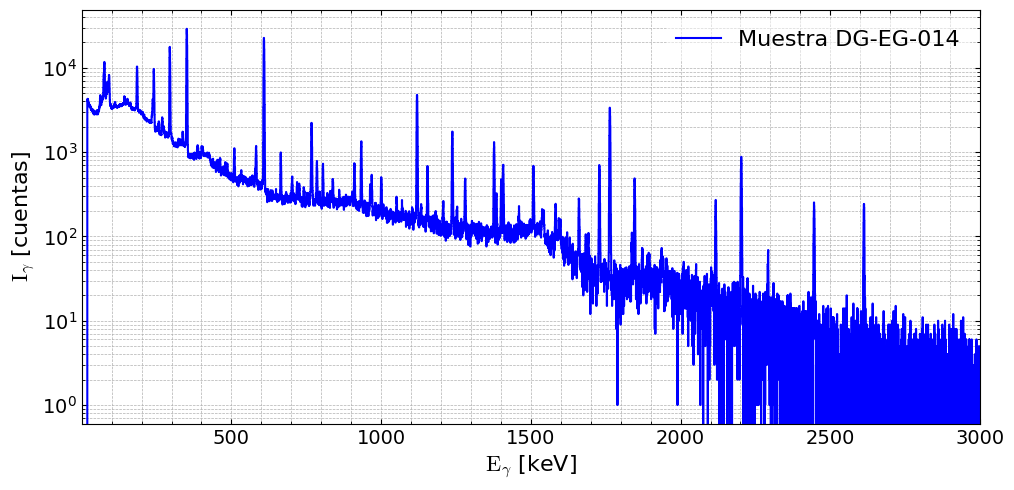


Pico:      1465 keV RGK
Y:         38094 ± 234
σ:         1.43 ± 0.01
FWHM:      3.36 ± 0.02
Intensidad:      282795 ± 2728


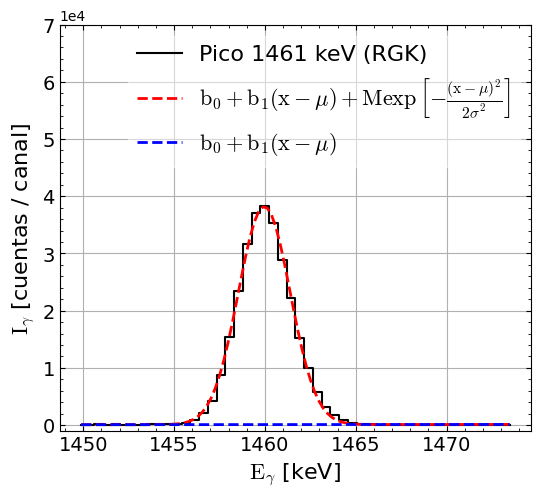


Pico:      1461 keV DG-EG-014 
Y:         81 ± 9
σ:         1.43 ± 0.16
FWHM:      3.37 ± 0.38
Intensidad:      605 ± 95


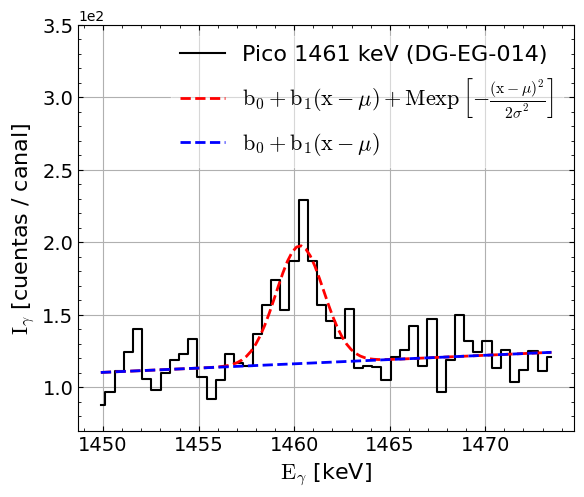


Pico:      352 keV RGU
Y:         88086 ± 1285
σ:         1.86 ± 0.03
FWHM:      4.38 ± 0.08
Intensidad:      852754 ± 20156


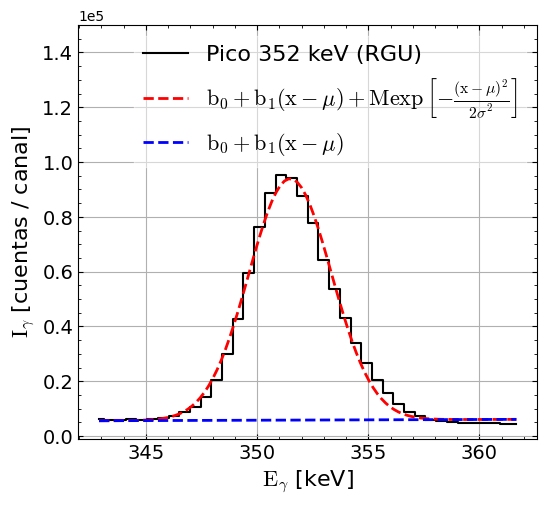


Pico:      352 keV DG-EG-014 
Y:         28406 ± 299
σ:         1.06 ± 0.01
FWHM:      2.50 ± 0.03
Intensidad:      157338 ± 2598


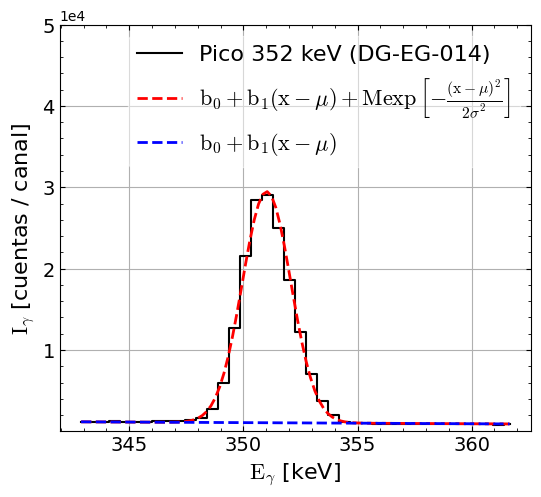


Pico:      2614.5 keV RGTh
Y:         10628 ± 98
σ:         2.23 ± 0.03
FWHM:      5.25 ± 0.06
Intensidad:      123515 ± 1843


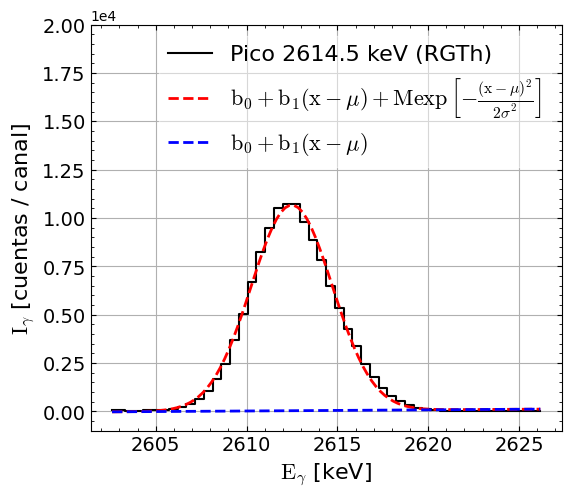


Pico:      2614.5 keV DG-EG-014 
Y:         247 ± 5
σ:         1.16 ± 0.03
FWHM:      2.72 ± 0.06
Intensidad:      1490 ± 43


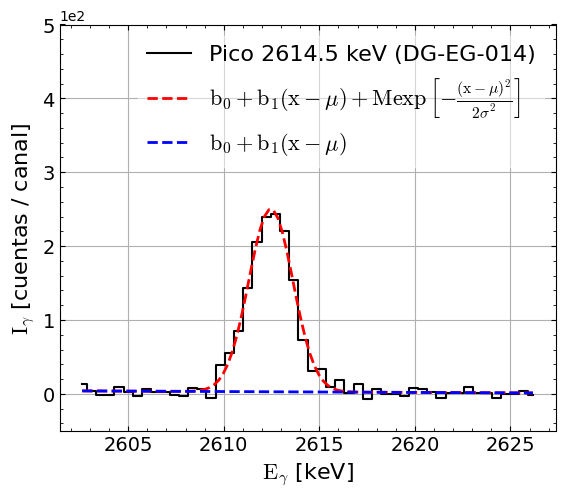

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib import font_manager
import numpy as np
from scipy.optimize import curve_fit
import os
from datetime import datetime

#%% FORMATO GRAFICAS
def formato_grafico(ax=None, decimalx=None, decimaly=None, legend_loc='upper right'):
    if ax is None:
        ax = plt.gca()

    fuente = 'sans'
    ax.title.set_size(14)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.title.set_family(fuente)
    ax.yaxis.label.set_family(fuente)
    ax.xaxis.label.set_family(fuente)
    ax.tick_params(axis='both', labelsize=14)

    plt.rcParams['mathtext.fontset'] = 'cm'  
    plt.rcParams['mathtext.rm'] = 'sans'  
    plt.rcParams['mathtext.default'] = 'rm'

    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    ax.tick_params(axis='x', direction='in', which='both', bottom=True, top=True)
    ax.tick_params(axis='y', direction='in', which='both', left=True, right=True)
    ax.tick_params(axis='x', which='minor', direction='in', bottom=True, top=True)
    ax.tick_params(axis='y', which='minor', direction='in', left=True, right=True)

    # Configurar la notación científica
    if decimalx is not None:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.{decimalx}f}' if x != 0 else '0'))

    if decimaly is not None:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.{decimaly}f}' if x != 0 else '0'))

    if ax.get_legend() is not None:
        ax.legend(fontsize=16)

    font = font_manager.FontProperties(family='sans', style='normal', size=16)

    handles, labels = ax.get_legend_handles_labels()
    if handles and labels:
        ax.legend(loc=legend_loc, handles=handles, labels=labels, edgecolor='1', framealpha=0.5, prop=font)

#%% Funcion para el ajuste gaussiano
def gauss(x, A, B, C, mu, sigma):
    return A + B * (x - mu) + C * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def gauss_ajuste(x, y):
    media = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - media) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[1, 1, min(y), media, sigma])
    return popt, pcov

def Ajuste_gaussiano(canal, cuentas, extremo_inferior, extremo_superior, a_0=0, a_1=1, unidades='canal', titulo='Ajuste Gaussiano', etiqueta = 'Ajuste pico', ylim=None):
    x = canal[extremo_inferior:extremo_superior]
    y = cuentas[extremo_inferior:extremo_superior]

    x = x * a_1 + a_0

    popt, pcov = gauss_ajuste(x, y)
    A, B, C, mu, sigma = popt

    x_ajuste = np.linspace(extremo_inferior, extremo_superior, 100) * a_1 + a_0
    y_ajuste = A + B * (x_ajuste - mu) + C * np.exp(-1 / 2 * ((x_ajuste - mu) / sigma) ** 2)
    recta_ajuste = A + B * (x_ajuste - mu)

    FWHM = 2.35482 * sigma
    uncertainties = np.sqrt(np.diag(pcov))

    print("\nPico:     ", titulo)
    print("b0:        {:.0f} ± {:.0f}".format(A, uncertainties[0]))
    print("b1:        {:.3f} ± {:.3f}".format(B, uncertainties[1]))
    print("Y:         {:.0f} ± {:.0f}".format(C, uncertainties[2]))
    print("μ:         {:.2f} ± {:.2f}".format(mu, uncertainties[3]))
    print("σ:         {:.2f} ± {:.2f}".format(abs(sigma), abs(uncertainties[4])))
    print("FWHM:      {:.2f} ± {:.2f}".format(abs(FWHM), abs(FWHM * (uncertainties[4] / sigma))))
    sigma = sigma
    uncertainties[4] = uncertainties[4]
    I = abs((2 * np.pi) ** (1 / 2) * C * sigma)
    dI = I*np.sqrt((uncertainties[2]/C)**2 + (uncertainties[4]/sigma)**2)
    print("Intensidad:      {:.0f} ± {:.0f}".format(abs(I), abs(dI)))


    plt.figure(figsize=(6, 5))

    plt.step(x, y, 'k', label='{}'.format(etiqueta), where='mid')
    plt.plot(x_ajuste, y_ajuste, '--r', linewidth=2,label=r'$b_0 + b_1 (x - \mu) + M \exp \left[-\frac{(x-\mu)^2}{2\sigma^2} \right]$')
    plt.plot(x_ajuste, recta_ajuste, '--b', linewidth=2, label=r'$b_0 + b_1 (x - \mu) $')
    plt.grid()
    plt.title("")
    plt.ylabel(r'$I_{\gamma}$' + ' [cuentas / canal]')
    if unidades == 'canal':
        plt.xlabel(r'canal')
    elif unidades == 'keV':
        plt.xlabel(r'$E_{\gamma}$' + ' [keV]')
        
    if ylim:
        plt.ylim(ylim)
    
    formato_grafico()
    plt.tight_layout()
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    # Guardar la imagen
    save_path = r"Informe4/Imagenes"
    filename = f"Practica4_{titulo.replace(' ', '_')}.png"
    full_path = os.path.join(save_path, filename)
    plt.savefig(full_path, dpi=300, bbox_inches='tight')
    

    plt.show()

#%% RUTA ARCHIVOS

# Función para cargar los datos
def cargar_datos(ruta):
    return pd.read_csv(ruta, sep=',', names=["canal", "cuentas"],header=1)

# Rutas de los archivos
ruta_Calibracion = r"Informe4/Data/2021-11-15_cal_133Ba22Na137Cs60Co_600s_1.csv"
ruta_RGTh = r"Informe4/Data/2021-11-15_mue_IAEA-RGTh-1_24h.csv"
ruta_RGU = r"Informe4/Data/2021-11-16_mue_IAEA-RGU-1_24h.csv"
ruta_RGK = r"Informe4/Data/2021-11-17_mue_IAEA-RGK-1_24h.csv"
ruta_Muestra = r"Informe4/Data/2021-12-04_mue_DG-EG-014_24h.csv"
ruta_Fondo = r"Informe4/Data/2021-12-15_fon_24h.csv"

datos_Calibracion = cargar_datos(ruta_Calibracion)
datos_RGTh = cargar_datos(ruta_RGTh)
datos_RGU = cargar_datos(ruta_RGU)
datos_RGK = cargar_datos(ruta_RGK)
datos_Muestra = cargar_datos(ruta_Muestra)
datos_Fondo = cargar_datos(ruta_Fondo)


#%% PATRON CALIBRACION
plt.figure(figsize=(10, 5))

# Graficar los datos

# Posiciones de los picos y etiquetas
picos = [172, 577, 632, 742, 800, 1378, 2652, 2442, 2773]
etiquetas = ['79.61 keV', '276.39 keV', '302.85 keV', '356.01 keV', '383.84 keV', '661.66 keV', '1173.23 keV', '1274.54 keV', '1332.49 keV']

y_posiciones = 9*[17**3]

# Graficar líneas punteadas y textos con ajustes
for pico, etiqueta, y_pos in zip(picos, etiquetas, y_posiciones):
    plt.axvline(x=pico, linestyle='dashed', color='k', alpha=0.9)
    plt.text(pico + 15, y_pos, etiqueta, rotation=90, ha='left', va='center')

    
    
plt.step(datos_Calibracion["canal"], datos_Calibracion["cuentas"], color='r', label=r'$^{133}\text{Ba} + ^{137}\text{Cs} + ^{22}\text{Na} + ^{60}\text{Co} $', where='mid')

plt.xlabel(r'Canal')
plt.ylabel(r'$I_{\gamma}$' + ' [cuentas/canal]')
plt.legend()
plt.tight_layout()
plt.grid()
plt.xlim([1, 3000])
plt.ylim([1, 1000000])
formato_grafico()
plt.yscale('log')


# Guardar la imagen
save_path = r"Informe4/Imagenes"
filename = "Practica4_BaNaCoCs.png"
full_path = os.path.join(save_path, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()

#%% AJUSTE CALIBRACION
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=140, extremo_superior=200, unidades='canal', titulo=r'79.61 keV', etiqueta=r'Pico 79.61 keV $^{133}Ba$', ylim=[0,20000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=560, extremo_superior=600, unidades='canal', titulo=r'276.40 keV', etiqueta=r'Pico 276.40 keV $^{133}Ba$', ylim=[0,5000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=610, extremo_superior=650, unidades='canal', titulo=r'302.85 keV', etiqueta=r'Pico 302.85 keV $^{133}Ba$', ylim=[0,10000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=720, extremo_superior=770, unidades='canal', titulo=r'356.01 keV', etiqueta=r'Pico 356.01 keV $^{133}Ba$', ylim=[0,25000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=780, extremo_superior=820, unidades='canal', titulo=r'383.85 keV', etiqueta=r'Pico 383.85 keV $^{133}Ba$', ylim=[0,5000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=1360, extremo_superior=1400, unidades='canal', titulo=r'661.66 keV', etiqueta=r'Pico 661.66 keV $^{137}Cs$', ylim=[0,30000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=2630, extremo_superior=2670, unidades='canal', titulo=r'1274.54 keV', etiqueta=r'Pico 1274.54 keV $^{22}Na$', ylim=[0,500])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=2420, extremo_superior=2460, unidades='canal', titulo=r'1173.22 keV', etiqueta=r'Pico 1173.22 keV $^{60}Co$', ylim=[0,4000])
Ajuste_gaussiano(datos_Calibracion["canal"], datos_Calibracion["cuentas"], extremo_inferior=2750, extremo_superior=2790, unidades='canal', titulo=r'1332.49 keV', etiqueta=r'Pico 1332.49 keV $^{60}Co$', ylim=[0,3000])

#%% CALIBRACION
E_gamma_keV = [79.61, 276.39, 302.85, 356.01, 383.84, 661.66, 1173.23, 1274.54, 1332.49]

    
E_gamma_canal = [170.07, 576.79, 631.83, 742.44, 800.31, 1378.19, 2441.67, 2652.06, 2772.43]
dE_gamma_canal = [0.03, 0.05, 0.05, 0.05, 0.05, 0.04, 0.04, 0.07, 0.07]


def linear(x, a, b):
    return a + b * x

popt, pcov = curve_fit(linear, E_gamma_canal, E_gamma_keV, sigma=dE_gamma_canal, absolute_sigma=True)
a, b = popt
uncertainties = np.sqrt(np.diag(pcov))

x_fit = np.linspace(min(E_gamma_canal), max(E_gamma_canal), 100)
y_fit = linear(x_fit, *popt)

print("\nAjuste lineal (Canal vs. Energía en keV):")
print("a0:        {:.2f} ± {:.2f}".format(a, uncertainties[0]))
print("a1:        {:.4f} ± {:.2f}".format(b, uncertainties[1]))

fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(E_gamma_canal, E_gamma_keV, xerr=dE_gamma_canal, fmt='o', label="Datos (ajustes de picos)", color='k', capsize=3)
ax.plot(x_fit, y_fit, '-r', label=r"$E_{\gamma} \ [keV] = a_0 + a_1 \times canal$")

ax.set_ylabel(r'$E_{\gamma}$ [keV]')
ax.set_xlabel('canal')
ax.set_xlim([0, 3000])
ax.set_ylim([0, 1500])
ax.grid()

formato_grafico(legend_loc='upper left')
plt.tight_layout()

save_path = r"Informe4/Imagenes"
filename = "Practica4_Calibracion.png"
full_path = os.path.join(save_path, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()












x_RGTh = -1.72 + 0.4813*datos_RGTh["canal"]
x_RGU = -1.72 + 0.4813*datos_RGU["canal"]
x_RGK = -1.72 + 0.4813*datos_RGK["canal"]


y_RGTh = datos_RGTh["cuentas"] - datos_Fondo["cuentas"]
y_RGU = datos_RGU["cuentas"] - datos_Fondo["cuentas"]
y_RGK = datos_RGK["cuentas"] - datos_Fondo["cuentas"]


fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)

datos = [(x_RGTh, y_RGTh, 'Muestra RGTh'), 
         (x_RGU, y_RGU, 'Muestra RGU'), 
         (x_RGK, y_RGK, 'Muestra RGK')]

for ax, (x, y, label) in zip(axs, datos):
    ax.step(x, y, color='k', label=label, where='mid')
    ax.legend()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    formato_grafico(ax)
    ax.set_xscale("linear")
    ax.set_yscale("log")
    ax.set_xlim([1, 3000])
    ax.set_ylim([1, 1e6])
    ax.set_ylabel(r'$I_{\gamma}$' + ' [cuentas/canal]')


axs[2].set_xlabel(r'$E_{\gamma}$ [keV]')

plt.tight_layout()

save_path = r"Informe4/Imagenes"
filename = "Practica4_Referencias.png"
full_path = os.path.join(save_path, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()


x_Muestra = -1.72 + 0.4813 * datos_Muestra["canal"]
y_Muestra = datos_Muestra["cuentas"] - datos_Fondo["cuentas"]


plt.figure(figsize=(10,5))
plt.step(x_Muestra, y_Muestra, color='b', label='Muestra DG-EG-014', where='mid')

plt.xlabel(r'$E_{\gamma}$ [keV]')
plt.ylabel(r'$I_{\gamma}$' + ' [cuentas]')
formato_grafico()
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.xlim([1, 3000])

save_path = r"Informe4/Imagenes"
filename = "Practica4_Muestra.png"
full_path = os.path.join(save_path, filename)
plt.savefig(full_path, dpi=300, bbox_inches='tight')

plt.show()


def gauss(x, A, B, C, mu, sigma):
    return A + B * (x - mu) + C * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def gauss_ajuste(x, y):
    media = np.sum(x * y) / np.sum(y)
    sigma = np.sqrt(np.sum(y * (x - media) ** 2) / np.sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[1, 1, min(y), media, sigma])
    return popt, pcov

def Ajuste_gaussiano_aux(canal, cuentas, extremo_inferior, extremo_superior, unidades='canal', titulo='Ajuste Gaussiano', etiqueta='Ajuste pico', ylim=None, sigma_opcional=None):
    
    m = 0.4813
    b = -1.72
    x = canal[extremo_inferior:extremo_superior]
    y = cuentas[extremo_inferior:extremo_superior] - datos_Fondo["cuentas"][extremo_inferior:extremo_superior]

    if unidades == 'keV':
        x = m * x + b

    popt, pcov = gauss_ajuste(x, y)
    A, B, C, mu, sigma = popt

    x_ajuste = np.linspace(x.min(), x.max(), 100)
    y_ajuste = gauss(x_ajuste, *popt)
    recta_ajuste = A + B * (x_ajuste - mu)
    
    if sigma_opcional != None:
        sigma = sigma_opcional

    FWHM = 2.35482 * sigma
    uncertainties = np.sqrt(np.diag(pcov))

    print("\nPico:     ", titulo)
    print("Y:         {:.0f} ± {:.0f}".format(C, uncertainties[2]))
    print("σ:         {:.2f} ± {:.2f}".format(abs(sigma), abs(uncertainties[4])))
    print("FWHM:      {:.2f} ± {:.2f}".format(abs(FWHM), abs(FWHM * (uncertainties[4] / sigma))))

    I = abs((2 * np.pi) ** 0.5 * C * sigma)/m
    dI = I * np.sqrt((uncertainties[2] / C) ** 2 + (uncertainties[4] / sigma) ** 2)
    print("Intensidad:      {:.0f} ± {:.0f}".format(abs(I), abs(dI)))

    plt.figure(figsize=(6, 5))

    plt.step(x, y, 'k', label='{}'.format(etiqueta), where='mid')
    plt.plot(x_ajuste, y_ajuste, '--r', linewidth=2,label=r'$b_0 + b_1 (x - \mu) + M \exp \left[-\frac{(x-\mu)^2}{2\sigma^2} \right]$')
    plt.plot(x_ajuste, recta_ajuste, '--b', linewidth=2, label=r'$b_0 + b_1 (x - \mu) $')
    plt.grid()
    plt.title("")
    plt.ylabel(r'$I_{\gamma}$' + ' [cuentas / canal]')
    if unidades == 'canal':
        plt.xlabel(r'canal')
    elif unidades == 'keV':
        plt.xlabel(r'$E_{\gamma}$' + ' [keV]')
        
    if ylim:
        plt.ylim(ylim)
    
    formato_grafico()
    plt.tight_layout()
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    save_path = r"Informe4/Imagenes"
    filename = f"Practica4_{titulo.replace(' ', '_')}.png"
    full_path = os.path.join(save_path, filename)
    plt.savefig(full_path, dpi=300, bbox_inches='tight')
    

    plt.show()


Ajuste_gaussiano_aux(datos_RGK["canal"], datos_RGK["cuentas"], extremo_inferior=3015, extremo_superior=3065, unidades='keV', titulo=r'1465 keV RGK', etiqueta=r'Pico 1461 keV (RGK)', ylim=[-1000, 70000])
Ajuste_gaussiano_aux(datos_Muestra["canal"], datos_Muestra["cuentas"], extremo_inferior=3015, extremo_superior=3065, unidades='keV', titulo=r'1461 keV DG-EG-014 ', etiqueta=r'Pico 1461 keV (DG-EG-014)', ylim=[70, 350], sigma_opcional=1.43)

Ajuste_gaussiano_aux(datos_RGU["canal"], datos_RGU["cuentas"], extremo_inferior=715, extremo_superior=755, unidades='keV', titulo=r'352 keV RGU', etiqueta=r'Pico 352 keV (RGU)', ylim=[-1000, 150000])
Ajuste_gaussiano_aux(datos_Muestra["canal"], datos_Muestra["cuentas"], extremo_inferior=715, extremo_superior=755, unidades='keV', titulo=r'352 keV DG-EG-014 ', etiqueta=r'Pico 352 keV (DG-EG-014)', ylim=[70, 50000])

Ajuste_gaussiano_aux(datos_RGTh["canal"], datos_RGTh["cuentas"], extremo_inferior=5410, extremo_superior=5460, unidades='keV', titulo=r'2614.5 keV RGTh', etiqueta=r'Pico 2614.5 keV (RGTh)', ylim=[-1000, 20000])
Ajuste_gaussiano_aux(datos_Muestra["canal"], datos_Muestra["cuentas"], extremo_inferior=5410, extremo_superior=5460, unidades='keV', titulo=r'2614.5 keV DG-EG-014 ', etiqueta=r'Pico 2614.5 keV (DG-EG-014)', ylim=[-50, 500])


m = 0.4813
b = -1.72
a = int(round((2614.5-b)/m - 15,0))
c = int(round((2614.5-b)/m + 10,0))
